# Diferencia de imagenes Satelitales

In [1]:
import rasterio as rio
import rasterio.plot as rioplt
import matplotlib.pyplot as plt
import numpy as np
import os

## Ubicacion de archivos necesarios

In [2]:
folderInputPath = '../imageInput/'
outputPath = '../imageOutput/'
inputListPath = [folderInputPath + path + '/' for path in os.listdir(folderInputPath)]
inputListPath

['../imageInput/LC08_L1TP_005070_20160102_20170404_01_T1/',
 '../imageInput/LC08_L1TP_005070_20190806_20190820_01_T1/',
 '../imageInput/LC08_L1TP_005070_20190126_20190206_01_T1/',
 '../imageInput/LC08_L1TP_005069_20191025_20191025_01_RT/']

In [3]:
inputPath_1908 = inputListPath[1]
inputPath_1901 = inputListPath[2]
inputPath_1601 = inputListPath[0]

bList_1908 = [srcB for srcB in os.listdir(inputPath_1908) if srcB[-4:] == '.TIF']
bList_1901 = [srcB for srcB in os.listdir(inputPath_1901) if srcB[-4:] == '.TIF']
bList_1601 = [srcB for srcB in os.listdir(inputPath_1601) if srcB[-4:] == '.TIF']

### LIsta de las bandas disponibles

In [4]:
print([str(i)+': '+b[41:-4] for i, b in enumerate(bList_1908)])

['0: B3', '1: B6', '2: B5', '3: B2', '4: B4', '5: B10', '6: B7', '7: B1', '8: B9', '9: BQA', '10: B11', '11: B8']


In [5]:
srcB4_1908 = rio.open(inputPath_1908+bList_1908[4])

In [6]:
print([str(i)+': '+b[41:-4] for i, b in enumerate(bList_1601)])

['0: B7', '1: B1', '2: B11', '3: B9', '4: B10', '5: B5', '6: BQA', '7: B8', '8: B3', '9: B4', '10: B6', '11: B2']


In [7]:
srcB4_1601 = rio.open(inputPath_1601+bList_1601[9])

## Verificacion de parametros de las imagenes

In [8]:
print(srcB4_1908.dtypes)
print(srcB4_1601.dtypes)
if srcB4_1908.dtypes == srcB4_1601.dtypes:
    print('Type OK')
else:
    print('Error Type')

('uint16',)
('uint16',)
Type OK


In [9]:
print(srcB4_1908.shape)
print(srcB4_1601.shape)
if srcB4_1908.width == srcB4_1601.width and srcB4_1908.height == srcB4_1601.height:
    print('Size OK')
else:
    print('Error Size')

(7771, 7651)
(7771, 7651)
Size OK


In [10]:
print(srcB4_1908.bounds)
print(srcB4_1601.bounds)
if srcB4_1908.bounds == srcB4_1601.bounds:
    print('Bounds OK')
else:
    print('Error Bounds')

BoundingBox(left=507585.0, bottom=-1715415.0, right=737115.0, top=-1482285.0)
BoundingBox(left=507585.0, bottom=-1715415.0, right=737115.0, top=-1482285.0)
Bounds OK


In [11]:
print(srcB4_1908.transform)
print(srcB4_1601.transform)
if srcB4_1908.transform == srcB4_1601.transform:
    print('Transform OK')
else:
    print('Error Transform')

| 30.00, 0.00, 507585.00|
| 0.00,-30.00,-1482285.00|
| 0.00, 0.00, 1.00|
| 30.00, 0.00, 507585.00|
| 0.00,-30.00,-1482285.00|
| 0.00, 0.00, 1.00|
Transform OK


In [12]:
print(srcB4_1908.crs)
print(srcB4_1601.crs)
if srcB4_1908.crs == srcB4_1601.crs:
    print('CRS OK')
else:
    print('Error CRs')

EPSG:32618
EPSG:32618
CRS OK


## Se restan las imagenes

In [13]:
dif_B4 = np.abs(srcB4_1908.read() - srcB4_1601.read())

### Creacion del archivo donde se guarda la imagen

In [14]:
new_src = rio.open(
     outputPath + 'diffB4.tif',
     'w',
     driver='GTiff',
     height=srcB4_1908.shape[0],
     width=srcB4_1908.shape[1],
     count=1,
     dtype=srcB4_1908.dtypes[0],
     crs=srcB4_1908.crs,
     transform=srcB4_1908.transform,
     )
new_src.write(dif_B4)
new_src.close()

In [15]:
srcB4_1908.close()
srcB4_1601.close()
diff_srcB4 = rio.open(outputPath + 'diffB4.tif')

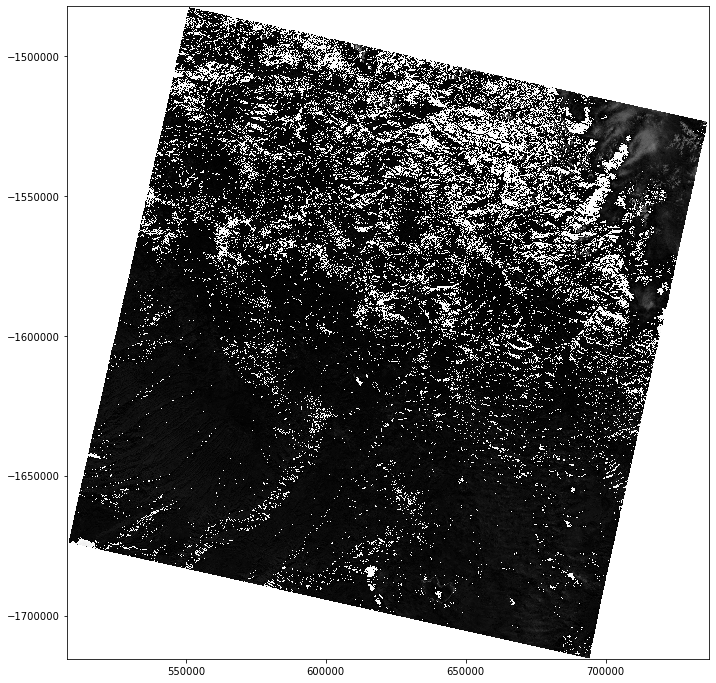

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rioplt.show((diff_srcB4, 1), cmap='Greys', interpolation='none', ax=ax)
#plot.show((diff_srcB4.read(), 1), contour=True, ax=ax)
plt.show()

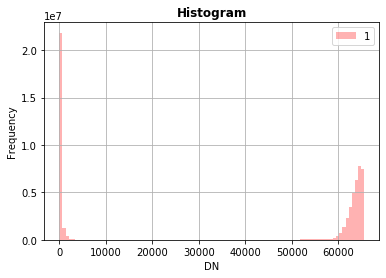

In [17]:
rioplt.show_hist(diff_srcB4, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

In [18]:
mask = dif_B4 < 50000
dif_B4 = dif_B4 - (mask*dif_B4)
dif_B4 = dif_B4 - (~mask*50000)

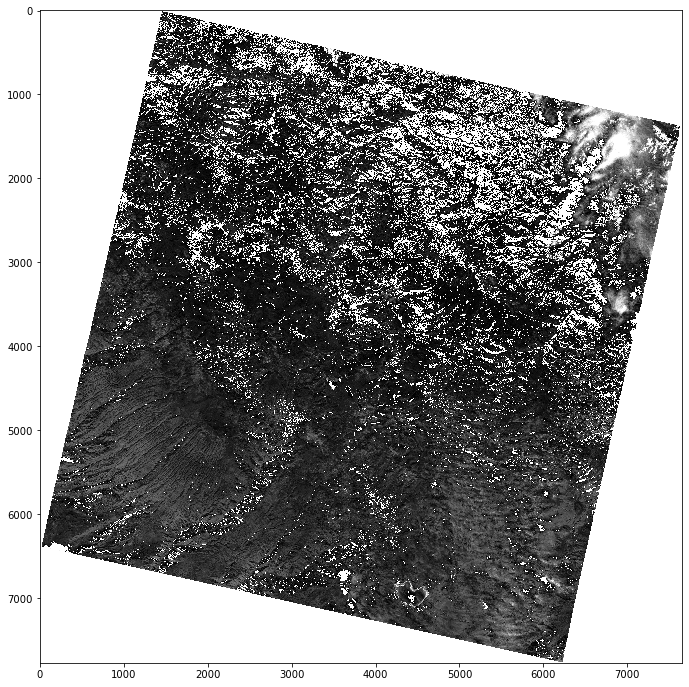

In [19]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rioplt.show(dif_B4, cmap='Greys', interpolation='none', ax=ax)
#plot.show((diff_srcB4.read(), 1), contour=True, ax=ax)
plt.show()

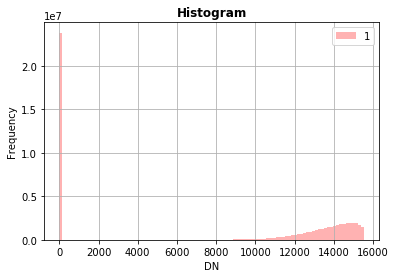

In [20]:
rioplt.show_hist(dif_B4, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')